# **El Centro de Distribucion**

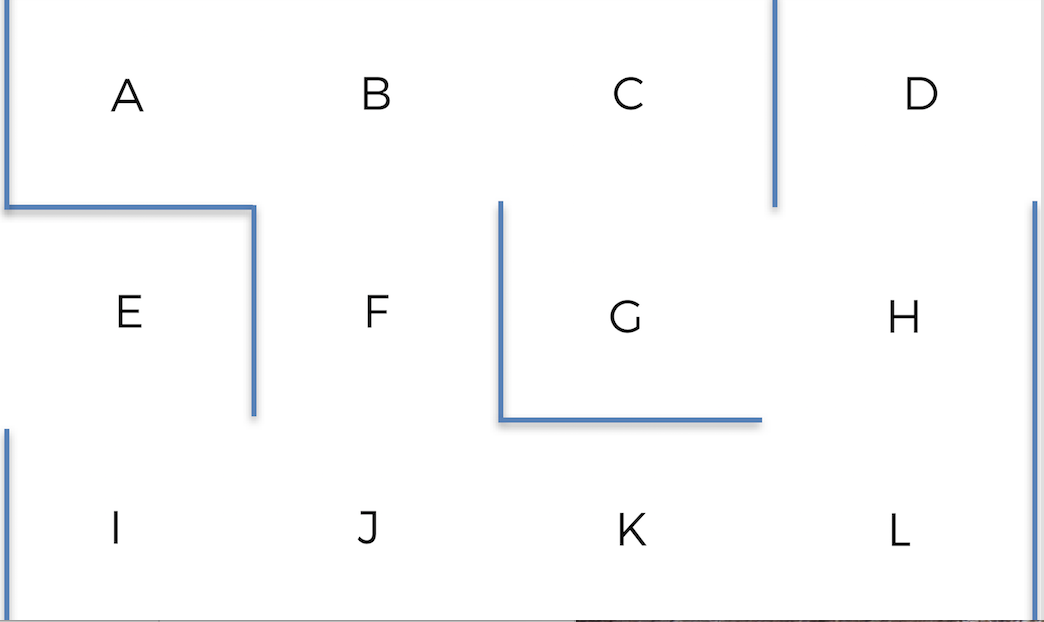

### **Parte 1: Definir el Entorno**

In [5]:
#importar librerias
import numpy as np

# 1.1 Definir - mapa de ubicaciones a estados
ubicacion_a_estado = {'A': 0,
                     'B': 1,
                     'C': 2,
                     'D': 3,
                     'E': 4,
                     'F': 5,
                     'G': 6,
                     'H': 7,
                     'I': 8,
                     'J': 9,
                     'K': 10,
                     'L': 11}

# 1.2 Definir - mapa de estados a ubicaciones
estado_a_ubicacion = {estado : ubicacion for ubicacion, estado in ubicacion_a_estado.items()}

# 1.3 - Definir - lista de acciones
acciones =  [0, 1, 2, 3, 4, 5, 6, 8, 9, 10, 11]

#### Matrix de R(s, a) - representando acciones possibles en cada estado

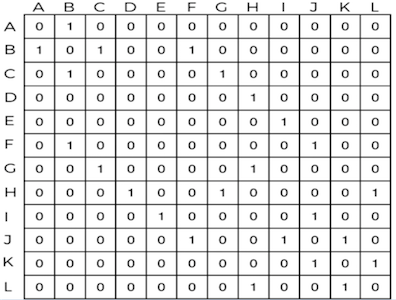

In [6]:
# 1.4 Definir matrix de acciones
R = np.array([[0,1,0,0,0,0,0,0,0,0,0,0],
              [1,0,1,0,0,1,0,0,0,0,0,0],
              [0,1,0,0,0,0,1,0,0,0,0,0],
              [0,0,0,0,0,0,0,1,0,0,0,0],
              [0,0,0,0,0,0,0,0,1,0,0,0],
              [0,1,0,0,0,0,0,0,0,1,0,0],
              [0,0,1,0,0,0,1,1,0,0,0,0],
              [0,0,0,1,0,0,1,0,0,0,0,1],
              [0,0,0,0,1,0,0,0,0,1,0,0],
              [0,0,0,0,0,1,0,0,1,0,1,0],
              [0,0,0,0,0,0,0,0,0,1,0,1],
              [0,0,0,0,0,0,0,1,0,0,1,0]])

### **Parte 2. Construir el Agente con Q-learning**
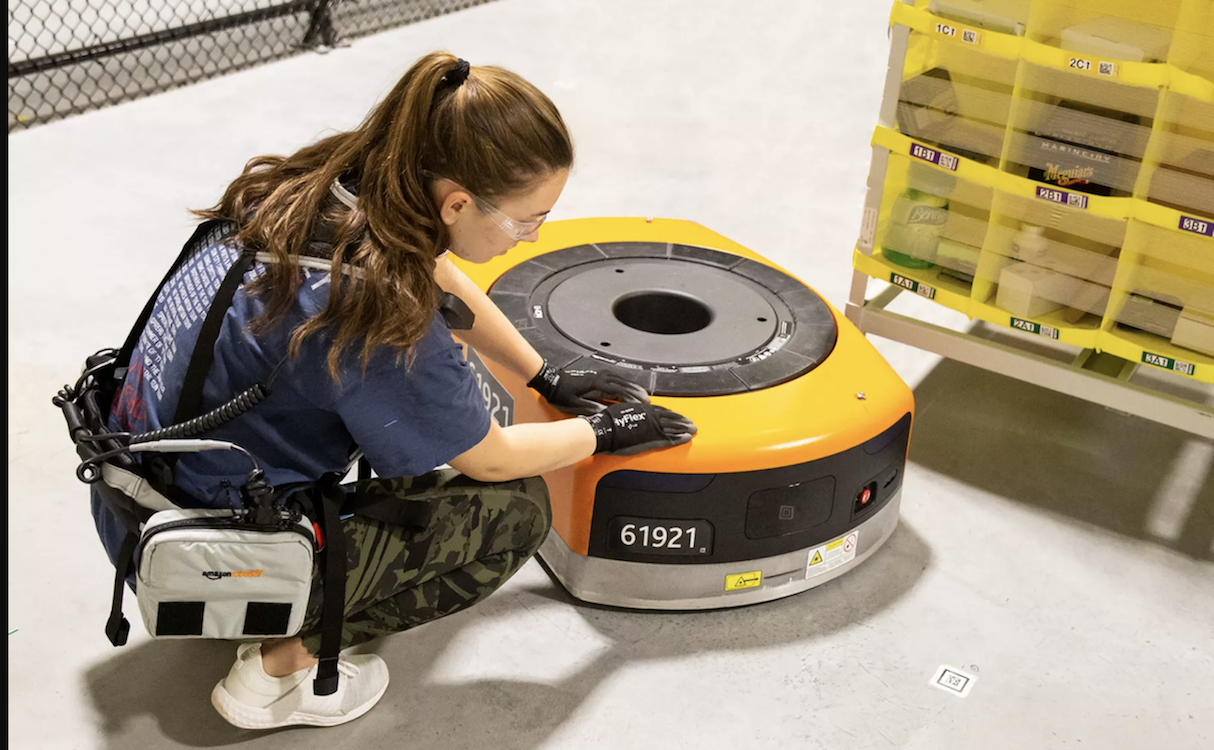

In [7]:
# 2.1 inializar parametetros

alpha = 0.7 # parametro - tasa de aprendizaje 
gamma = 0.9 # parametro - tasa de descuento al futuro

In [18]:
# 2.2 Implentar una funcion que aprende la ruta mas corta entre una ubicacion de comienzo y una ubicacion final

def ruta_optima(ubicacion_inicial, ubicacion_final):
    
    # crear una copia de el matrix de resultados para que modificaciones de ruta no affecten
    R2 = np.copy(R)
    
    # conseguir el estado(indice) de la ubicacion final
    estado_final = ubicacion_a_estado[ubicacion_final]
    
    # cambiar el valor de premio de ubicacion final
    R2[estado_final, estado_final] = 1000
    
    ## Aprendizaje de Q!!!
    Q = aprendizaje_Q(R2)
    
    # lista de la ruta de ubicacions
    ruta = [ubicacion_inicial]
    
    # usando los valores de Q, navega el entorno
    ubicacion_siguiente = ubicacion_inicial
    # mientras que no se a llegado a la ubicacion final
    while (ubicacion_siguiente != ubicacion_final):
        # consigue el estado de la ubicacion donde estas
        estado_inicial = ubicacion_a_estado[ubicacion_inicial] 
        # selecione la accion con el valor de Q mas alto en este estado
        estado_siguiente = np.argmax(Q[estado_inicial,]) 
        # consigue la ubicacion del proximo estado
        ubicacion_siguiente = estado_a_ubicacion[estado_siguiente]
        # aggrega la ubicacion a la lista de rutas
        ruta.append(ubicacion_siguiente)
        # continuar desde esta ubicacion
        ubicacion_inicial = ubicacion_siguiente
    # devuelve ruta final
    return ruta

### Ecuación de Q
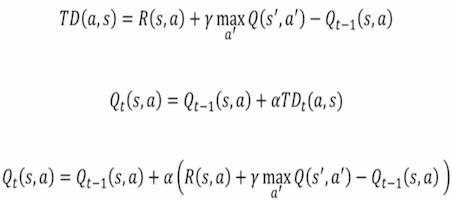

In [19]:
# 2.3 Implementar algoritmo Q de aprendizaje
def aprendizaje_Q(R2):
    
    # Inicializar matrix Q de valores de acciones (12 acciones x 12 estados)
    Q = np.array(np.zeros([12,12]))
    
    for episodio in range(1000): # apprender por 1000 episodios
        # escojer un estado del entorno al azar
        estado_presente = np.random.randint(0,12)
        # lista de acciones possibles
        acciones_posibles = []
        # Determinar la lista de acciones possibles en el estado presente 
        for accion in range(12):
            if R2[estado_presente, accion] > 0:
                acciones_posibles.append(accion)
        # selecionar una accion al azar
        accion = np.random.choice(acciones_posibles)
        # determina el estado siguiente
        estado_siguiente = accion
        # 
        valor_Q_reciente = R2[estado_presente, accion] + gamma * Q[estado_siguiente, np.argmax(Q[estado_siguiente,])]
        valor_Q_anterior = Q[estado_presente, accion]
        TD = valor_Q_reciente - valor_Q_anterior
        
        Q[estado_presente, accion] = Q[estado_presente, accion] + alpha * TD
    return Q

In [28]:
print('Ruta Optima:')
ruta_optima('E', 'G')

Ruta Optima:


['E', 'I', 'J', 'K', 'L', 'H', 'G']

### Poner el Sistema en Produccion
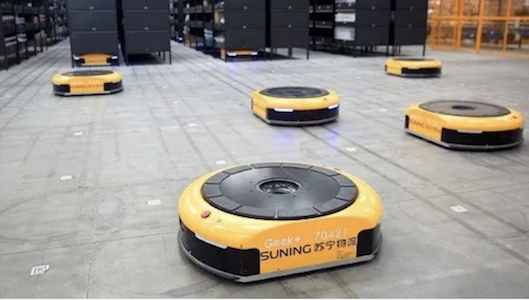

In [34]:
# Finalizar ruta optima, de ubicacion de recojer y ubicacion de despacho
def encontrar_ruta(ubicacion_inicial, ubicacion_recojer, ubicacion_despacho):
    return ruta_optima(ubicacion_inicial, ubicacion_recojer) + ruta_optima(ubicacion_recojer, ubicacion_despacho)[1:]

# Printing the final route
print('Ruta Encontrada')
encontrar_ruta('E', 'G', 'K')

Ruta Encontrada


['E', 'I', 'J', 'F', 'B', 'C', 'G', 'H', 'L', 'K']

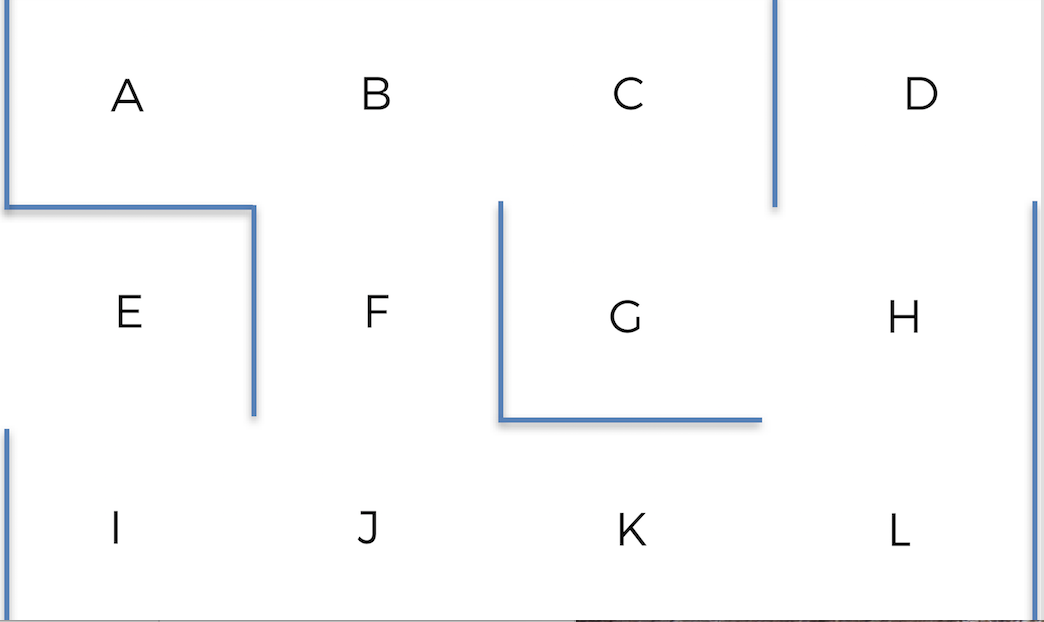